## Problem Statement

This month you have been hired by a new car trader company to help sell its used cars. You will be analyzing used cars from multiple manufacturers and of different models. Your job is to help the car trader company determine the price of its used cars.

## Evaluation

\begin{equation*}
MSE = {\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat{y}_{i})^{2}}
\end{equation*}
<br>

## Understanding the Dataset

Each column in the dataset is labeled and explained in more detail below. <br><br>
**manufacturer_name:** The name of the car manufacturer. <br>
**model_name:** The name of the car model. <br>
**transmission:** The type of transmission the car has. <br>
**color:** The body color of the car. <br>
**odometer_value:** The distance travelled by the vehicle in kilometers. <br>
**year_produced:** The year the car was produced. <br>
**engine_fuel:** The fuel type of the engine of the car. <br>
**engine_has_gas:** Whether or not the car has a propane tank with tubing. <br>
**engine_type:** The engine type of the car. <br>
**engine_capacity:** Capacity of the engine in liters. <br>
**body_type:** The of body the car has. <br>
**has_warranty:** Whether the car has warranty. <br>
**state:** The state of the car. (new, owned, etc.) <br>
**drivetrain:** Type of drivetrain. (front, rear, all) <br>
**feature_1 - feature_9:** These features are boolean values about properties of the car. <br>
**duration_listed:** The number of days the car is listed in the catalog. <br>
**price_usd:** Price of the car in USD. <br>

### Importing libraries and reading the csv files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler,LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer


import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Input, Embedding, concatenate, Flatten, Reshape
from tensorflow.keras.optimizers import Adam


from sklearn_pandas import DataFrameMapper


%matplotlib inline

In [2]:
np.random.seed(340)
tf.random.set_seed(340)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('public_cars.csv')

### EDA

In [5]:
pd.set_option('max_columns',None)
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_usd
0,Ford,Fusion,mechanical,blue,245000,2006,gasoline,False,gasoline,1.6,hatchback,False,owned,front,True,False,False,False,False,False,False,False,False,False,7,4250.0
1,Dodge,Caravan,automatic,silver,265542,2002,gasoline,False,gasoline,3.3,minivan,False,owned,front,False,True,False,False,False,False,False,False,False,False,133,4000.0
2,Ford,Galaxy,mechanical,blue,168000,2009,diesel,False,diesel,1.8,minivan,False,owned,front,False,False,False,True,False,False,True,True,True,True,0,10900.0
3,Mazda,6,mechanical,other,225522,2008,gasoline,False,gasoline,1.8,universal,False,owned,front,False,True,True,False,False,True,False,False,True,True,20,6999.0
4,Audi,80,mechanical,black,370000,1991,gasoline,False,gasoline,1.8,sedan,False,owned,front,False,False,False,False,False,False,False,False,False,True,160,1600.0


In [6]:
df.shape

(30824, 26)

In [7]:
df.nunique()

manufacturer_name      55
model_name           1070
transmission            2
color                  12
odometer_value       5086
year_produced          62
engine_fuel             6
engine_has_gas          2
engine_type             3
engine_capacity        59
body_type              12
has_warranty            2
state                   3
drivetrain              3
feature_0               2
feature_1               2
feature_2               2
feature_3               2
feature_4               2
feature_5               2
feature_6               2
feature_7               2
feature_8               2
feature_9               2
duration_listed       733
price_usd            2379
dtype: int64

In [8]:
df.dtypes

manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas          bool
engine_type           object
engine_capacity      float64
body_type             object
has_warranty            bool
state                 object
drivetrain            object
feature_0               bool
feature_1               bool
feature_2               bool
feature_3               bool
feature_4               bool
feature_5               bool
feature_6               bool
feature_7               bool
feature_8               bool
feature_9               bool
duration_listed        int64
price_usd            float64
dtype: object

### From the domain perspective all the columns are important

In [9]:
df.isna().mean()*100

manufacturer_name    0.000000
model_name           0.000000
transmission         0.000000
color                0.000000
odometer_value       0.000000
year_produced        0.000000
engine_fuel          0.000000
engine_has_gas       0.000000
engine_type          0.000000
engine_capacity      0.025954
body_type            0.000000
has_warranty         0.000000
state                0.000000
drivetrain           0.000000
feature_0            0.000000
feature_1            0.000000
feature_2            0.000000
feature_3            0.000000
feature_4            0.000000
feature_5            0.000000
feature_6            0.000000
feature_7            0.000000
feature_8            0.000000
feature_9            0.000000
duration_listed      0.000000
price_usd            0.000000
dtype: float64

In [10]:
# Engine Capacity has 8 null values

In [11]:
df.columns

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain', 'feature_0', 'feature_1', 'feature_2', 'feature_3',
       'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8',
       'feature_9', 'duration_listed', 'price_usd'],
      dtype='object')

In [12]:
Cat_cols = ['manufacturer_name', 'model_name', 'transmission', 'color','engine_fuel','engine_type','body_type', 'state','drivetrain']

In [13]:
df['manufacturer_name'].value_counts().head(10)

Volkswagen       3406
Opel             2193
BMW              2091
Ford             2080
Renault          1999
Audi             1972
Mercedes-Benz    1807
Peugeot          1529
Citroen          1236
Nissan           1084
Name: manufacturer_name, dtype: int64

In [14]:
for i in df.columns:
    print('Column: {}'.format(i))
    print('Number of unique variables: {} \n'.format(df[i].nunique()))
    print("Value Counts of '{}'".format(i))
    print(df[i].value_counts().head(),'\n')
    print('**********************************************************\n')

Column: manufacturer_name
Number of unique variables: 55 

Value Counts of 'manufacturer_name'
Volkswagen    3406
Opel          2193
BMW           2091
Ford          2080
Renault       1999
Name: manufacturer_name, dtype: int64 

**********************************************************

Column: model_name
Number of unique variables: 1070 

Value Counts of 'model_name'
Passat    1153
Astra      595
Golf       577
A6         546
Mondeo     503
Name: model_name, dtype: int64 

**********************************************************

Column: transmission
Number of unique variables: 2 

Value Counts of 'transmission'
mechanical    20493
automatic     10331
Name: transmission, dtype: int64 

**********************************************************

Column: color
Number of unique variables: 12 

Value Counts of 'color'
black     6162
silver    5480
blue      4671
white     3390
grey      2962
Name: color, dtype: int64 

**********************************************************

Column

In [15]:
df[df['manufacturer_name'] == 'Saab']['model_name'].unique()

array(['9000', '900', '05-Sep', '03-Sep', '9 - 7X', '9-2X'], dtype=object)

In [16]:
df['model_name'] = df['model_name'].replace(['3-Sep','5-Sep','9 - 7X'],['9-3','9-5','9-7X'])

In [17]:
df['model_age'] = 2020 - df['year_produced'] + 1 #(including that year)
df.drop('year_produced', axis = 1, inplace=True)

In [18]:
df = df[['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'engine_fuel', 'engine_has_gas', 'engine_type',
       'engine_capacity', 'body_type', 'has_warranty', 'state', 'drivetrain',
       'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'duration_listed', 'model_age','price_usd']]

In [19]:
for x in df['manufacturer_name'].unique():
    print('Manufacturer: ', x, '\n')
    print(df[df['manufacturer_name']==x]['model_name'].value_counts().head())
    print('*****************************\n')

Manufacturer:  Ford 

Mondeo     503
Focus      303
Transit    247
Escort     162
Galaxy     153
Name: model_name, dtype: int64
*****************************

Manufacturer:  Dodge 

Caravan          69
Stratus          48
Grand Caravan    35
Caliber          26
Intrepid         18
Name: model_name, dtype: int64
*****************************

Manufacturer:  Mazda 

626     274
6       223
323     181
3       115
CX-7     55
Name: model_name, dtype: int64
*****************************

Manufacturer:  Audi 

A6     546
A4     400
100    306
80     234
A8     126
Name: model_name, dtype: int64
*****************************

Manufacturer:  Volkswagen 

Passat    1153
Golf       577
Jetta      186
T4         163
Touran     161
Name: model_name, dtype: int64
*****************************

Manufacturer:  Opel 

Astra     595
Vectra    469
Omega     291
Zafira    287
Corsa     117
Name: model_name, dtype: int64
*****************************

Manufacturer:  Volvo 

S80     99
XC90    98
S60     

In [20]:
df.describe(include = ['int64','float64'], percentiles= [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

,odometer_value,engine_capacity,duration_listed,model_age,price_usd
count,30824.000000,30816.000000,30824.000000,30824.000000,30824.000000
mean,248803.130515,2.054232,80.344407,18.060310,6630.598604
std,135760.720763,0.667535,112.656926,8.048786,6412.213626
min,0.000000,0.200000,0.000000,2.000000,1.000000
10%,85000.000000,1.400000,7.000000,7.000000,1000.000000
20%,137000.000000,1.600000,17.000000,11.000000,1700.000000
30%,179000.000000,1.600000,30.000000,13.000000,2600.000000
40%,212000.000000,1.800000,45.000000,15.000000,3600.000000
50%,250000.000000,2.000000,59.000000,18.000000,4800.000000
60%,280000.000000,2.000000,70.000000,20.000000,6200.000000


In [21]:
df.describe(exclude=['int64','float64'])

,manufacturer_name,model_name,transmission,color,engine_fuel,engine_has_gas,engine_type,body_type,has_warranty,state,drivetrain,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
count,30824,30824,30824,30824,30824,30824,30824,30824,30824,30824,30824,30824,30824,30824,30824,30824,30824,30824,30824,30824,30824
unique,55,1070,2,12,6,2,3,12,2,3,3,2,2,2,2,2,2,2,2,2,2
top,Volkswagen,Passat,mechanical,black,gasoline,False,gasoline,sedan,False,owned,front,False,True,False,False,False,False,False,False,False,True
freq,3406,1153,20493,6162,19259,29754,20511,10433,30457,30154,22193,23756,18764,23945,22341,23417,19916,25599,22767,18043,17787


### Quantile Clipping

<AxesSubplot:xlabel='price_usd'>

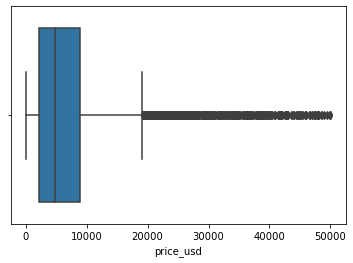

In [22]:
sns.boxplot(df['price_usd'])

In [23]:
df[df['price_usd'] < 250]

,manufacturer_name,model_name,transmission,color,odometer_value,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,model_age,price_usd
7,Ford,Sierra,mechanical,blue,290000,gasoline,False,gasoline,2.0,hatchback,False,emergency,rear,True,False,False,False,False,False,False,False,False,False,378,33,200.00
149,ВАЗ,2107,mechanical,blue,200000,gasoline,False,gasoline,1.5,sedan,False,owned,rear,True,False,False,False,False,False,False,False,False,False,85,22,200.00
824,Ford,Escort,mechanical,other,350000,gasoline,False,gasoline,1.4,hatchback,False,emergency,front,True,False,False,False,False,False,False,False,False,False,16,27,150.00
843,Mazda,626,mechanical,grey,222000,gasoline,False,gasoline,2.0,universal,False,owned,front,False,False,False,False,False,False,False,False,False,True,0,30,142.27
1029,Ford,Sierra,mechanical,red,250000,gasoline,False,gasoline,1.6,sedan,False,owned,rear,True,False,False,False,False,False,False,False,False,False,46,31,142.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30038,Ford,Orion,mechanical,blue,349384,gasoline,False,gasoline,1.4,sedan,False,owned,front,True,False,False,False,False,False,False,False,False,False,32,28,240.30
30407,Seat,Malaga,mechanical,silver,300000,gas,True,gasoline,1.2,sedan,False,owned,front,True,False,False,False,False,False,False,False,False,False,60,32,213.41
30468,Ford,Fiesta,mechanical,white,200000,gasoline,False,gasoline,1.0,hatchback,False,emergency,front,True,False,False,False,False,False,False,False,False,False,17,38,150.00
30560,Rover,600-Series,mechanical,green,1000000,gasoline,False,gasoline,2.0,sedan,False,emergency,front,False,True,False,False,False,False,False,False,False,False,548,27,200.00


In [24]:
df[df['price_usd'] > 20000]

,manufacturer_name,model_name,transmission,color,odometer_value,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,model_age,price_usd
61,BMW,320,automatic,black,11000,diesel,False,diesel,2.0,sedan,False,owned,all,True,False,False,False,False,False,False,False,False,False,56,2,42800.0
69,Audi,Q7,automatic,white,105000,diesel,False,diesel,3.0,suv,False,owned,all,False,True,True,True,True,True,True,True,True,True,216,7,32200.0
95,Toyota,Land Cruiser,automatic,black,142000,gasoline,False,gasoline,2.7,suv,False,owned,all,False,True,False,True,True,True,True,True,True,True,111,10,23000.0
105,Mercedes-Benz,C63AMG,automatic,black,76000,gasoline,False,gasoline,6.2,coupe,False,owned,rear,False,True,True,True,True,True,True,True,True,True,151,8,29000.0
130,BMW,X5 M,automatic,black,125000,gasoline,False,gasoline,5.0,suv,False,owned,all,False,True,True,True,True,True,True,True,True,True,91,11,25500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30743,Toyota,Highlander,automatic,silver,99700,gasoline,False,gasoline,3.5,suv,False,owned,all,False,True,False,True,True,True,True,True,True,True,76,8,24900.0
30768,Kia,Sorento,automatic,grey,87500,diesel,False,diesel,2.2,suv,False,owned,all,False,True,True,True,True,True,True,True,True,True,97,5,28000.0
30775,Lexus,GS,automatic,silver,91000,gasoline,False,gasoline,2.5,sedan,False,owned,rear,False,True,True,True,True,True,True,True,True,True,144,9,25450.0
30818,Mercedes-Benz,G400,automatic,black,200000,diesel,False,diesel,4.0,suv,False,owned,all,False,False,True,True,True,True,True,False,True,True,7,20,25000.0


In [25]:
df.loc[df['price_usd'] < 250,'price_usd'] = 250
df.describe(include = ['int64','float64'])

,odometer_value,engine_capacity,duration_listed,model_age,price_usd
count,30824.000000,30816.000000,30824.000000,30824.000000,30824.000000
mean,248803.130515,2.054232,80.344407,18.060310,6630.892507
std,135760.720763,0.667535,112.656926,8.048786,6411.918346
min,0.000000,0.200000,0.000000,2.000000,250.000000
25%,158146.500000,1.600000,23.000000,12.000000,2145.857500
50%,250000.000000,2.000000,59.000000,18.000000,4800.000000
75%,325000.000000,2.300000,91.000000,23.000000,8950.000000
max,1000000.000000,7.500000,2232.000000,71.000000,50000.000000


## Visualization

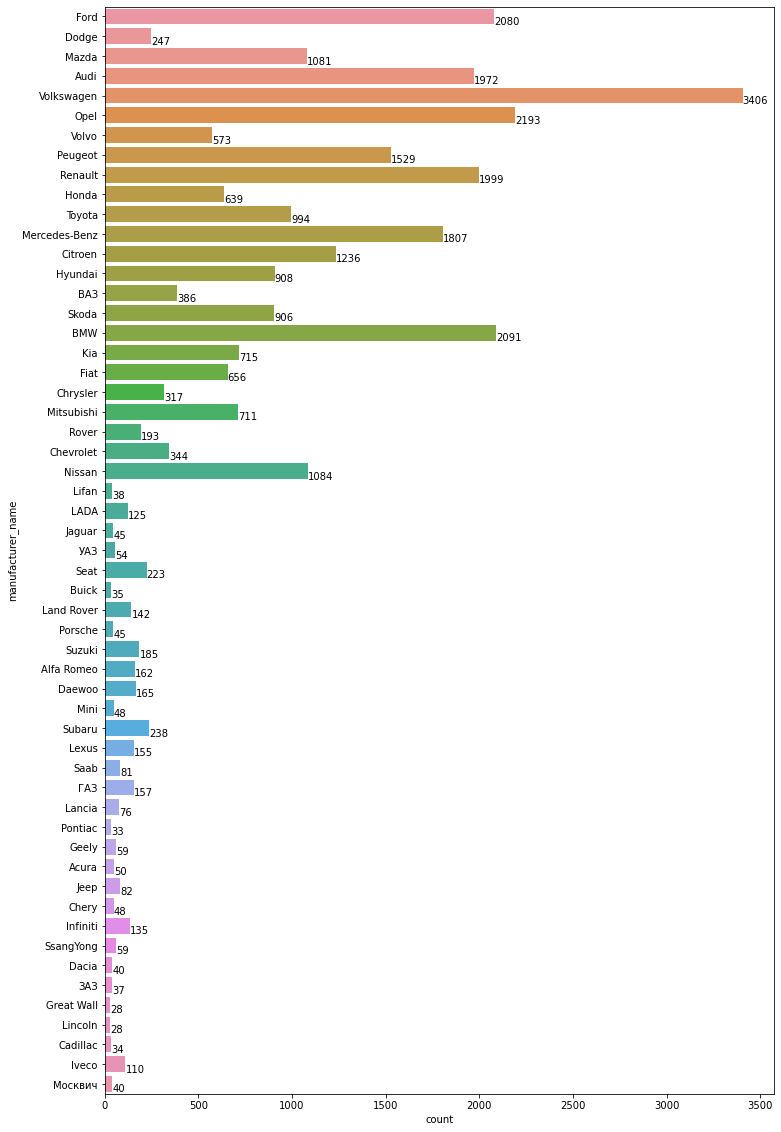

In [26]:
plt.figure(figsize = (12,20))
bar_plot1 = sns.countplot(y = df['manufacturer_name']);
for p in bar_plot1.patches:
        x_value = p.get_width()
        y_value = p.get_y() + p.get_height()
        bar_plot1.text(x_value, y_value, x_value)

In [27]:
df.dtypes

manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
engine_fuel           object
engine_has_gas          bool
engine_type           object
engine_capacity      float64
body_type             object
has_warranty            bool
state                 object
drivetrain            object
feature_0               bool
feature_1               bool
feature_2               bool
feature_3               bool
feature_4               bool
feature_5               bool
feature_6               bool
feature_7               bool
feature_8               bool
feature_9               bool
duration_listed        int64
model_age              int64
price_usd            float64
dtype: object

In [28]:
object_cols = list(df.select_dtypes('object').columns)
print(object_cols)
cat_cols = []
for x in object_cols:
    if df[x].nunique() < 5:
        cat_cols.append(x)
        

print(cat_cols)
object_cols = [i for i in object_cols if i not in cat_cols]
print(object_cols)

['manufacturer_name', 'model_name', 'transmission', 'color', 'engine_fuel', 'engine_type', 'body_type', 'state', 'drivetrain']
['transmission', 'engine_type', 'state', 'drivetrain']
['manufacturer_name', 'model_name', 'color', 'engine_fuel', 'body_type']


In [29]:
for x in cat_cols:
    print(df[x].unique())
    print('\n')

['mechanical' 'automatic']


['gasoline' 'diesel' 'electric']


['owned' 'emergency' 'new']


['front' 'rear' 'all']




In [30]:
df[cat_cols] = df[cat_cols].astype('category')

In [31]:
def barplot(x,df):
    plt.figure(figsize = (6,3))
    bar_plot1 = sns.countplot(x=x, data=df)
    plt.xticks(rotation=90)
    for p in bar_plot1.patches:
        height = p.get_height()
        bar_plot1.text(p.get_x()+ p.get_width()/3, height + 1, height)

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'engine_fuel', 'engine_has_gas', 'engine_type', 'body_type',
       'has_warranty', 'state', 'drivetrain', 'feature_0', 'feature_1',
       'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6',
       'feature_7', 'feature_8', 'feature_9'],
      dtype='object')


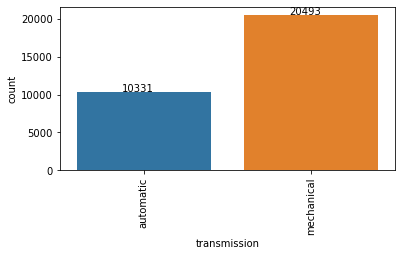

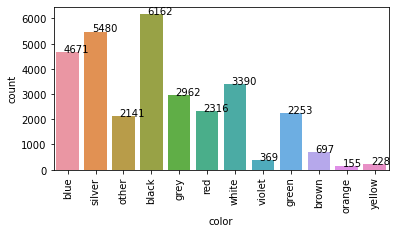

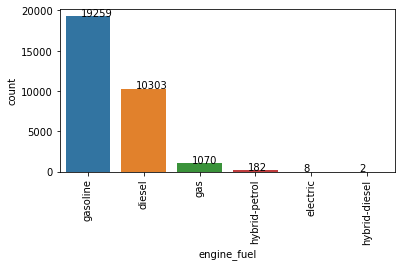

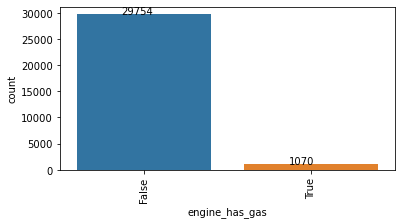

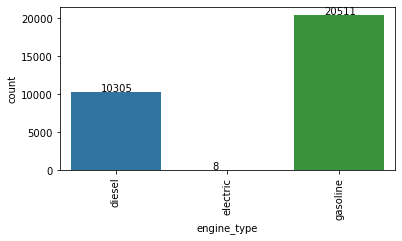

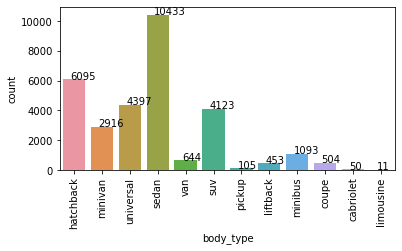

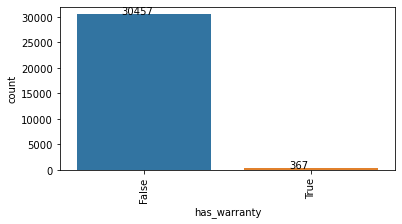

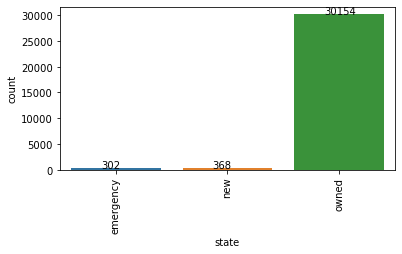

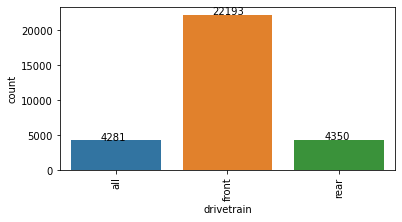

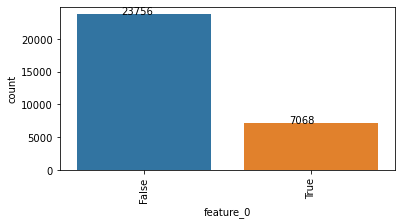

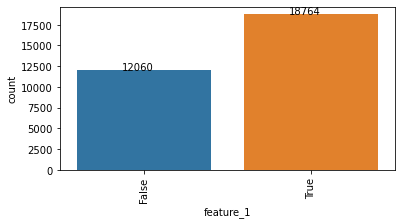

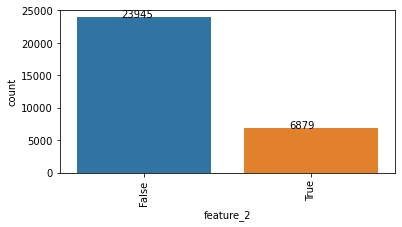

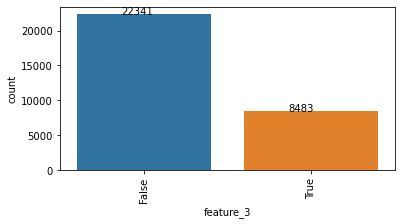

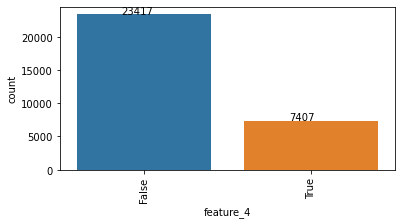

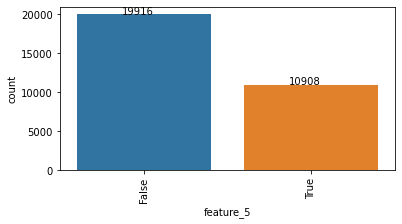

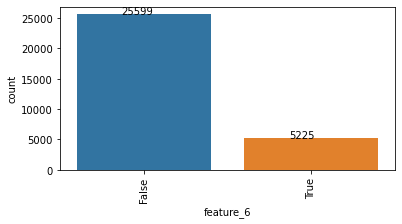

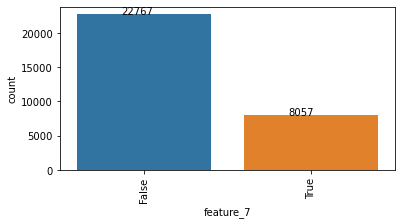

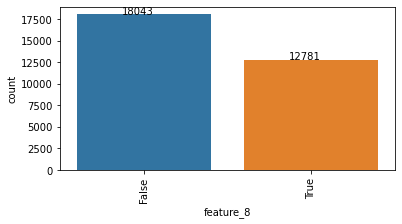

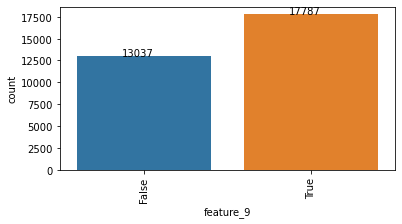

In [32]:
non_num_cols = df.select_dtypes(exclude = ['int64','float64']).columns
print(non_num_cols)
non_num_cols = non_num_cols[2:]
for x in non_num_cols:
    barplot(x,df);

In [33]:
df[df['has_warranty']==True]['manufacturer_name'].unique()

array(['Skoda', 'Volkswagen', 'LADA', 'BMW', 'Honda', 'Kia', 'Mazda',
       'Hyundai', 'Ford', 'Toyota', 'Jaguar', 'Subaru', 'Nissan', 'ВАЗ',
       'Renault', 'Audi', 'Iveco', 'Lifan', 'УАЗ'], dtype=object)

Feature: odometer_value


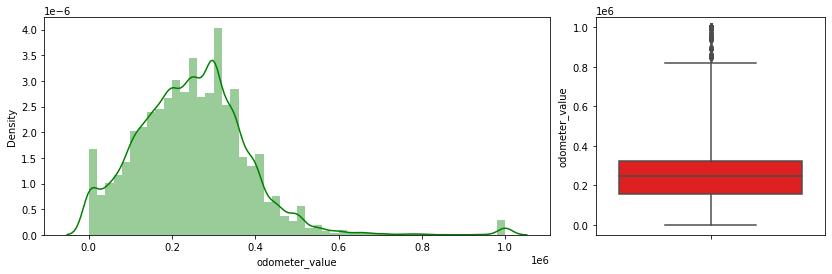

Feature: engine_capacity


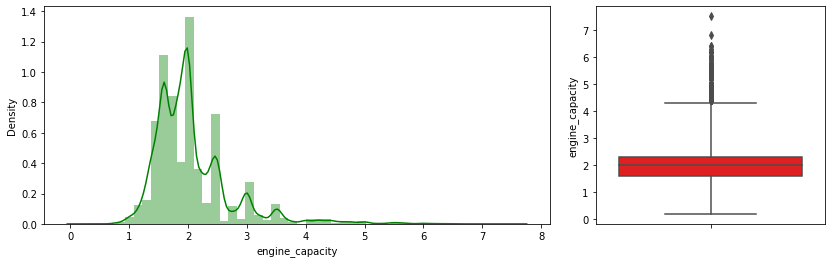

Feature: duration_listed


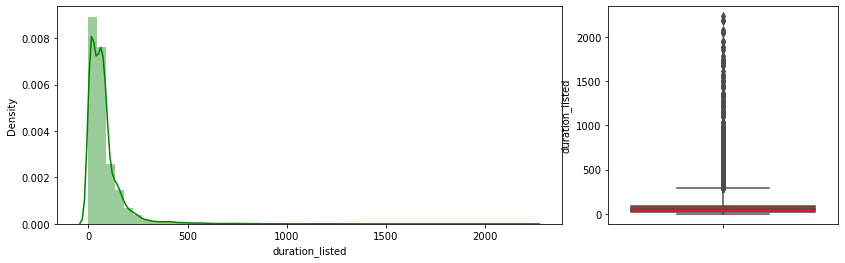

Feature: model_age


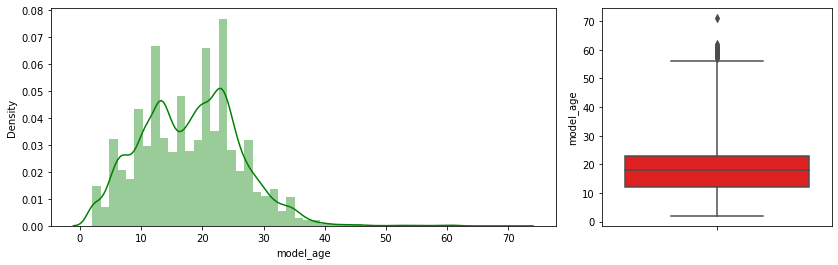

Feature: price_usd


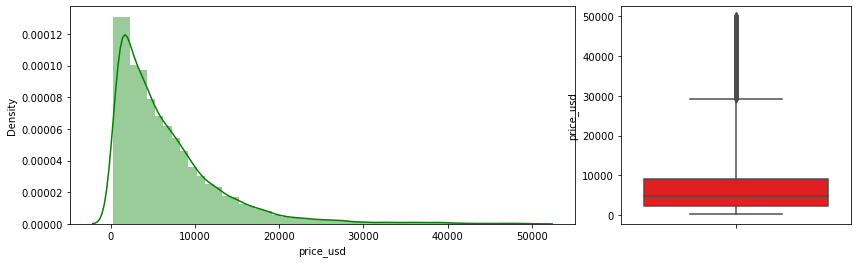

In [34]:
for x in df.select_dtypes(['int64','float64']).columns:
    fig = plt.figure(figsize=(14,4))
    gs = fig.add_gridspec(3,3)
    ax1 = fig.add_subplot(gs[:3,0:2])
    ax2 = fig.add_subplot(gs[:3,2])
    
    print('Feature: {}'.format(x))
    sns.distplot(df[x], ax = ax1, kde = True, color='green')
           
    sns.boxplot(y = x,data = df, ax = ax2,whis=3,color='red')
    
    plt.show()

In [35]:
oda_iqr = df['odometer_value'].quantile(0.75) + 3*(df['odometer_value'].quantile(0.75) - df['odometer_value'].quantile(0.25))
df.loc[df['odometer_value']> oda_iqr, 'odometer_value'] = oda_iqr

<AxesSubplot:xlabel='odometer_value'>

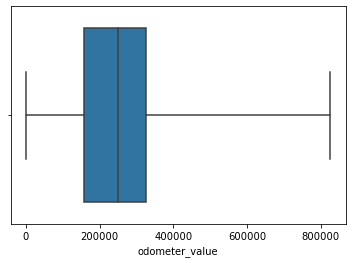

In [36]:
sns.boxplot(df['odometer_value'], whis=3)

In [37]:
mod_iqr = df['model_age'].quantile(0.75) + 3*(df['model_age'].quantile(0.75) - df['model_age'].quantile(0.25))
df[df['model_age']> mod_iqr]

,manufacturer_name,model_name,transmission,color,odometer_value,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,model_age,price_usd
955,Skoda,Octavia,mechanical,red,38000.0,gasoline,False,gasoline,1.2,coupe,False,owned,rear,True,False,False,False,False,False,False,False,False,False,88,61,400.00
1170,ГАЗ,21,mechanical,grey,250000.0,gasoline,False,gasoline,2.4,sedan,False,owned,rear,True,False,False,False,False,False,False,False,False,False,122,59,3100.00
2005,ГАЗ,69,mechanical,green,500.0,gasoline,False,gasoline,1.6,suv,False,owned,all,True,False,False,False,False,False,False,False,False,False,89,59,4742.47
2174,Москвич,407,mechanical,green,1.0,gasoline,False,gasoline,1.3,sedan,False,owned,rear,True,False,False,False,False,False,False,False,False,False,2,62,800.00
3465,Москвич,408,mechanical,other,70000.0,gasoline,False,gasoline,1.4,sedan,False,owned,rear,True,False,False,False,False,False,False,False,False,False,613,59,5500.00
3653,ГАЗ,21,mechanical,red,100000.0,gasoline,False,gasoline,2.0,sedan,False,owned,rear,True,False,False,False,False,False,False,False,False,False,39,57,6300.00
4160,ГАЗ,21,mechanical,brown,1000.0,gasoline,False,gasoline,2.4,sedan,False,owned,rear,True,False,False,False,False,False,False,False,False,False,2,59,8500.00
5298,Москвич,402,mechanical,blue,35000.0,gasoline,False,gasoline,1.2,sedan,False,emergency,rear,True,False,False,False,False,False,False,False,False,False,128,61,350.00
6160,ГАЗ,21,mechanical,green,20000.0,gasoline,False,gasoline,2.4,sedan,False,owned,rear,True,False,False,False,False,False,False,False,False,False,13,61,450.00
6573,ГАЗ,М20,mechanical,blue,100000.0,gasoline,False,gasoline,2.4,hatchback,False,owned,rear,True,False,False,False,False,False,False,False,False,False,3,71,2000.00


In [38]:
df.loc[df['model_age']> mod_iqr, 'model_age'] = mod_iqr

<AxesSubplot:xlabel='model_age'>

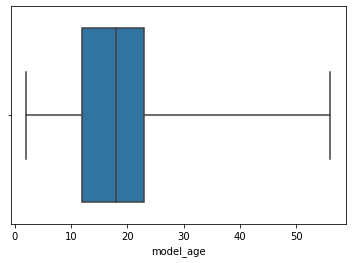

In [39]:
sns.boxplot(df['model_age'], whis=3)

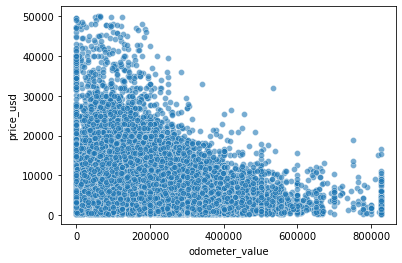

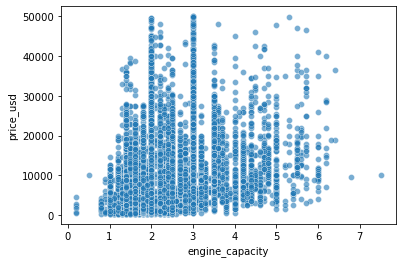

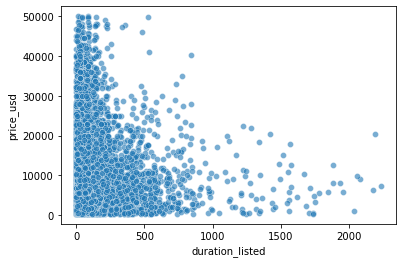

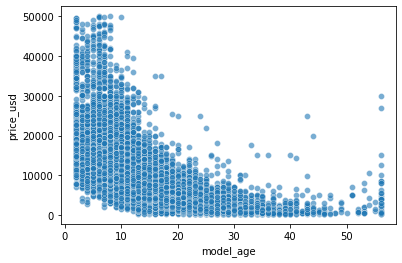

In [40]:
for x in df.select_dtypes(['int64','float64']).columns[:-1]:
    plt.figure(figsize = (6,4))
    sns.scatterplot(x = x, y = 'price_usd', data=df, alpha=0.6);

In [41]:
bool_cols = df.select_dtypes(['bool']).columns
bool_cols
for x in bool_cols:
    df[x] = df[x].replace([True,False],[1,0])

In [42]:
df.nunique()

manufacturer_name      55
model_name           1070
transmission            2
color                  12
odometer_value       5068
engine_fuel             6
engine_has_gas          2
engine_type             3
engine_capacity        59
body_type              12
has_warranty            2
state                   3
drivetrain              3
feature_0               2
feature_1               2
feature_2               2
feature_3               2
feature_4               2
feature_5               2
feature_6               2
feature_7               2
feature_8               2
feature_9               2
duration_listed       733
model_age              55
price_usd            2335
dtype: int64

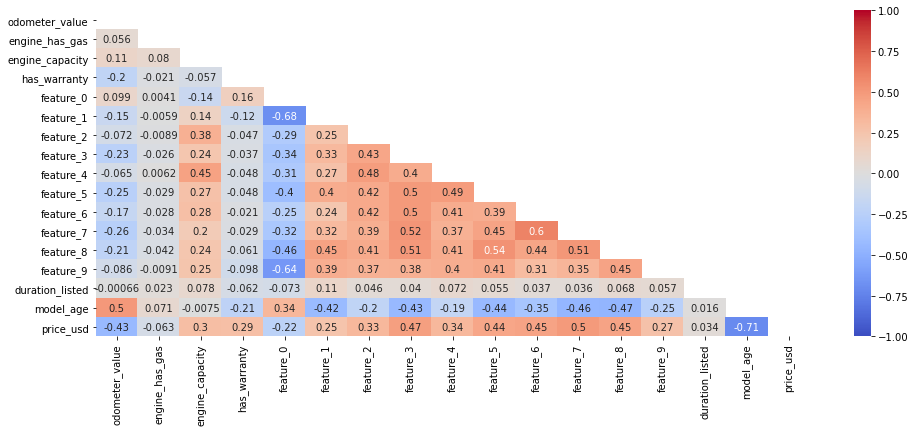

In [43]:
cm = df.corr()
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(16,6))
sns.heatmap(cm,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=True,
            mask = mask);

In [44]:
df.describe(exclude = ['object','category'])

,odometer_value,engine_has_gas,engine_capacity,has_warranty,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,model_age,price_usd
count,30824.000000,30824.000000,30816.000000,30824.000000,30824.000000,30824.000000,30824.000000,30824.000000,30824.000000,30824.00000,30824.000000,30824.000000,30824.000000,30824.000000,30824.000000,30824.000000,30824.000000
mean,247767.180979,0.034713,2.054232,0.011906,0.229302,0.608746,0.223170,0.275208,0.240300,0.35388,0.169511,0.261387,0.414644,0.577050,80.344407,18.056028,6630.892507
std,130606.244157,0.183055,0.667535,0.108466,0.420391,0.488039,0.416378,0.446626,0.427272,0.47818,0.375209,0.439398,0.492669,0.494036,112.656926,8.027077,6411.918346
min,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,250.000000
25%,158146.500000,0.000000,1.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,23.000000,12.000000,2145.857500
50%,250000.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,59.000000,18.000000,4800.000000
75%,325000.000000,0.000000,2.300000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.00000,0.000000,1.000000,1.000000,1.000000,91.000000,23.000000,8950.000000
max,825560.500000,1.000000,7.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,2232.000000,56.000000,50000.000000


In [45]:
df.describe(include=['object','category'])

,manufacturer_name,model_name,transmission,color,engine_fuel,engine_type,body_type,state,drivetrain
count,30824,30824,30824,30824,30824,30824,30824,30824,30824
unique,55,1070,2,12,6,3,12,3,3
top,Volkswagen,Passat,mechanical,black,gasoline,gasoline,sedan,owned,front
freq,3406,1153,20493,6162,19259,20511,10433,30154,22193


## Categorical Embedding on Object type features

In [46]:
object_cols

['manufacturer_name', 'model_name', 'color', 'engine_fuel', 'body_type']

In [47]:
le_dict= {}
for col in object_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
  #Save a mapping of categorical columns values and its transforamtion - needed 
  #later on for mapping purposes
    le_dict[col] = dict(zip(le.classes_, le.transform(le.classes_)))

In [48]:
print(le_dict['manufacturer_name'])

{'Acura': 0, 'Alfa Romeo': 1, 'Audi': 2, 'BMW': 3, 'Buick': 4, 'Cadillac': 5, 'Chery': 6, 'Chevrolet': 7, 'Chrysler': 8, 'Citroen': 9, 'Dacia': 10, 'Daewoo': 11, 'Dodge': 12, 'Fiat': 13, 'Ford': 14, 'Geely': 15, 'Great Wall': 16, 'Honda': 17, 'Hyundai': 18, 'Infiniti': 19, 'Iveco': 20, 'Jaguar': 21, 'Jeep': 22, 'Kia': 23, 'LADA': 24, 'Lancia': 25, 'Land Rover': 26, 'Lexus': 27, 'Lifan': 28, 'Lincoln': 29, 'Mazda': 30, 'Mercedes-Benz': 31, 'Mini': 32, 'Mitsubishi': 33, 'Nissan': 34, 'Opel': 35, 'Peugeot': 36, 'Pontiac': 37, 'Porsche': 38, 'Renault': 39, 'Rover': 40, 'Saab': 41, 'Seat': 42, 'Skoda': 43, 'SsangYong': 44, 'Subaru': 45, 'Suzuki': 46, 'Toyota': 47, 'Volkswagen': 48, 'Volvo': 49, 'ВАЗ': 50, 'ГАЗ': 51, 'ЗАЗ': 52, 'Москвич': 53, 'УАЗ': 54}


In [49]:
input_df_list = []
for x in list(object_cols):
    input_df_list.append(df[x].values)

In [50]:
target = df['price_usd'].values

In [51]:
input_models = []

output_embeddings = []

embed_len = [6, 10, 4, 3, 4]

for x in range(len(object_cols)):
    cat_embed_name = object_cols[x] + '_embedding'
    no_of_unique_cat = df[object_cols[x]].nunique()
    embedding_size = embed_len[x]
    input_model = Input(shape=(1,), name = object_cols[x] + '_input')
    embed = Embedding(input_dim = no_of_unique_cat,output_dim = embedding_size, name = cat_embed_name)(input_model)
    output_model = Reshape(target_shape = (embedding_size,))(embed)
    
    input_models.append(input_model)
    output_embeddings.append(output_model)

In [52]:
input_models

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'manufacturer_name_input')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'model_name_input')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'color_input')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'engine_fuel_input')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'body_type_input')>]

In [53]:
output_embeddings

[<KerasTensor: shape=(None, 6) dtype=float32 (created by layer 'reshape')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'reshape_1')>,
 <KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'reshape_2')>,
 <KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'reshape_3')>,
 <KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'reshape_4')>]

In [54]:
embed_layer = concatenate(output_embeddings)
x = Dense(512, kernel_initializer='glorot_normal', activation = 'elu')(embed_layer)
x = Dense(256, kernel_initializer='glorot_normal', activation = 'elu')(x)
x = Dense(128, kernel_initializer='glorot_normal', activation = 'elu')(x)
x = Dense(64, kernel_initializer='glorot_normal', activation = 'elu')(x)
x = Dense(32, kernel_initializer='glorot_normal', activation = 'elu')(x)
x = Dense(16, kernel_initializer='glorot_normal', activation = 'elu')(x)
x = Dense(2, kernel_initializer='glorot_normal', activation = 'elu')(x)
output = Dense(1, activation='linear')(x)

In [55]:
model = Model(inputs = input_models,outputs = output)
model.compile(loss=tf.keras.losses.MeanSquaredError(name='MSE'), \
   optimizer= tf.keras.optimizers.Adam(),\
   metrics=tf.keras.metrics.MeanAbsoluteError(name='MAE'))

In [56]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
manufacturer_name_input (InputL [(None, 1)]          0                                            
__________________________________________________________________________________________________
model_name_input (InputLayer)   [(None, 1)]          0                                            
__________________________________________________________________________________________________
color_input (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
engine_fuel_input (InputLayer)  [(None, 1)]          0                                            
______________________________________________________________________________________________

In [57]:
history  =  model.fit(input_df_list, target, validation_split=0.25,\
                      epochs =  20, batch_size = 64, verbose= 2,shuffle=True)

Epoch 1/20
362/362 - 8s - loss: 34448096.0000 - MAE: 3818.9229 - val_loss: 19095358.0000 - val_MAE: 2850.0090
Epoch 2/20
362/362 - 2s - loss: 18233588.0000 - MAE: 2760.1294 - val_loss: 18098324.0000 - val_MAE: 2661.0632
Epoch 3/20
362/362 - 2s - loss: 17281908.0000 - MAE: 2684.9778 - val_loss: 17311352.0000 - val_MAE: 2652.1072
Epoch 4/20
362/362 - 2s - loss: 16698149.0000 - MAE: 2624.0645 - val_loss: 17209606.0000 - val_MAE: 2693.4434
Epoch 5/20
362/362 - 2s - loss: 16244944.0000 - MAE: 2573.9258 - val_loss: 17113930.0000 - val_MAE: 2680.4717
Epoch 6/20
362/362 - 2s - loss: 16015673.0000 - MAE: 2568.1167 - val_loss: 16859300.0000 - val_MAE: 2613.5681
Epoch 7/20
362/362 - 2s - loss: 15922928.0000 - MAE: 2551.6931 - val_loss: 17152424.0000 - val_MAE: 2734.7378
Epoch 8/20
362/362 - 2s - loss: 15768077.0000 - MAE: 2544.9265 - val_loss: 16837192.0000 - val_MAE: 2579.1895
Epoch 9/20
362/362 - 2s - loss: 15635379.0000 - MAE: 2524.9756 - val_loss: 16847334.0000 - val_MAE: 2590.6663
Epoch 10/2

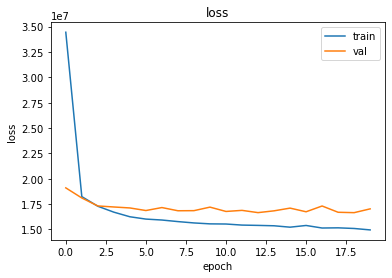

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

### Converting the values into dataframe and attaching them to the dataframe

In [59]:
print(model.get_layer('manufacturer_name_embedding').get_weights()[0][0])
print(model.get_layer('manufacturer_name_embedding').get_weights()[0].shape)

[ 0.00104934  0.03658924  0.04087028  0.01407119  0.00975727 -0.00494212]
(55, 6)


In [60]:
manufacturer_name_embeddings = {ind: model.get_layer('manufacturer_name_embedding').get_weights()[0][ind]\
                     for w, ind in le_dict['manufacturer_name'].items()}
manufacturer_name_df = pd.DataFrame(manufacturer_name_embeddings)
manufacturer_name_df = manufacturer_name_df.T.reset_index()
manufacturer_name_df = manufacturer_name_df.rename(columns = {'index': 'index_manu', 0: 'manu1',1: 'manu2',2: 'manu3',\
                       3: 'manu4',4: 'manu5',5: 'manu6'})
manufacturer_name_df.head()

,index_manu,manu1,manu2,manu3,manu4,manu5,manu6
0,0,0.001049,0.036589,0.040870,0.014071,0.009757,-0.004942
1,1,-0.213890,-0.154733,-0.144431,-0.165912,0.121129,-0.113347
2,2,0.012201,0.015322,0.033499,0.003992,-0.045792,-0.013357
3,3,0.145345,0.140598,0.086302,0.159178,-0.118539,0.088138
4,4,0.092706,0.026006,0.035406,0.061452,-0.021207,0.113802


In [61]:
print(model.get_layer('model_name_embedding').get_weights()[0][0])
print(model.get_layer('model_name_embedding').get_weights()[0].shape)

[ 0.02487143 -0.05611693 -0.08172391  0.08077395  0.00706567 -0.00555587
  0.08197021 -0.00834144 -0.0046205   0.06497445]
(1070, 10)


In [62]:
model_name_embeddings = {ind: model.get_layer('model_name_embedding').get_weights()[0][ind]\
                     for w, ind in le_dict['model_name'].items()}
model_name_df = pd.DataFrame(model_name_embeddings).T.reset_index()
model_name_df = model_name_df.rename(columns = {'index': 'index_model', 0: 'model1',1: 'model2',2: 'model3',\
                       3: 'model4',4: 'model5',5: 'model6', 6: 'model7', 7: 'model8', 8: 'model9', 9: 'model10'})
model_name_df.head()

,index_model,model1,model2,model3,model4,model5,model6,model7,model8,model9,model10
0,0,0.024871,-0.056117,-0.081724,0.080774,0.007066,-0.005556,0.081970,-0.008341,-0.004620,0.064974
1,1,0.046615,-0.039501,-0.104508,0.062193,-0.017212,-0.063403,0.067718,-0.002421,0.079557,0.027400
2,2,0.130828,-0.184817,-0.196927,0.295338,-0.118548,-0.108328,0.184249,0.108837,0.140761,0.219672
3,3,0.007814,-0.037564,-0.045327,0.009781,-0.010606,-0.009550,0.013946,0.077910,0.035568,0.057929
4,4,0.153936,-0.117648,-0.188520,0.203795,-0.139963,-0.186080,0.234351,0.181537,0.182791,0.194540


In [63]:
print(model.get_layer('color_embedding').get_weights()[0][0])
print(model.get_layer('color_embedding').get_weights()[0].shape)

[-0.07491744 -0.00341215  0.13756773 -0.10470697]
(12, 4)


In [64]:
color_embeddings = {ind: model.get_layer('color_embedding').get_weights()[0][ind]\
                     for w, ind in le_dict['color'].items()}
color_df = pd.DataFrame(color_embeddings).T.reset_index()
color_df = color_df.rename(columns = {'index': 'index_col', 0: 'color1',1: 'color2',2: 'color3', 3: 'color4'})

color_df.head()

,index_col,color1,color2,color3,color4
0,0,-0.074917,-0.003412,0.137568,-0.104707
1,1,-0.004768,-0.077384,-0.048752,-0.011237
2,2,-0.184553,-0.160994,0.238714,-0.229183
3,3,0.157368,0.127412,-0.206679,0.185393
4,4,-0.116461,-0.051829,0.096160,-0.075118


In [65]:
print(model.get_layer('engine_fuel_embedding').get_weights()[0][0])
print(model.get_layer('engine_fuel_embedding').get_weights()[0].shape)

[ 0.1511039  -0.06744725  0.10571644]
(6, 3)


In [66]:
engine_fuel_embeddings = {ind: model.get_layer('engine_fuel_embedding').get_weights()[0][ind]\
                     for w, ind in le_dict['engine_fuel'].items()}
engine_fuel_df = pd.DataFrame(engine_fuel_embeddings).T.reset_index()
engine_fuel_df = engine_fuel_df.rename(columns = {'index': 'index_ef', 0: 'ef1',1: 'ef2',2: 'ef3'})

engine_fuel_df.head()

,index_ef,ef1,ef2,ef3
0,0,0.151104,-0.067447,0.105716
1,1,0.340663,-0.345383,0.338882
2,2,-0.108087,0.274245,-0.317201
3,3,-0.010969,-0.024986,0.005856
4,4,-0.319822,0.388123,-0.368758


In [67]:
print(model.get_layer('body_type_embedding').get_weights()[0][0])
print(model.get_layer('body_type_embedding').get_weights()[0].shape)

[ 0.24263379 -0.2399234  -0.29392394  0.26181498]
(12, 4)


In [68]:
body_type_embeddings = {ind: model.get_layer('body_type_embedding').get_weights()[0][ind]\
                     for w, ind in le_dict['body_type'].items()}
body_type_df = pd.DataFrame(body_type_embeddings).T.reset_index()
body_type_df = body_type_df.rename(columns = {'index': 'index_bt', 0: 'bt1',1: 'bt2',2: 'bt3', 3: 'bt4'})

body_type_df.head()

,index_bt,bt1,bt2,bt3,bt4
0,0,0.242634,-0.239923,-0.293924,0.261815
1,1,-0.016924,0.060438,0.010817,-0.013050
2,2,-0.119561,0.068626,0.106918,-0.054693
3,3,-0.077913,0.155283,0.161495,-0.075284
4,4,0.156964,-0.153644,-0.163615,0.081389


In [69]:
print(manufacturer_name_df.shape)
print(model_name_df.shape)
print(color_df.shape)
print(engine_fuel_df.shape)
print(body_type_df.shape)

(55, 7)
(1070, 11)
(12, 5)
(6, 4)
(12, 5)


In [70]:
def merging_embeddings(dataframe):
    new_df = pd.merge(dataframe,manufacturer_name_df,how = 'inner', left_on='manufacturer_name', right_on='index_manu')
    new_df.drop(['manufacturer_name', 'index_manu'], axis = 1, inplace = True)
    print(new_df.shape)

    new_df = pd.merge(new_df,model_name_df,how = 'inner', left_on='model_name', right_on='index_model')
    new_df.drop(['model_name', 'index_model'], axis = 1, inplace = True)
    print(new_df.shape)

    new_df = pd.merge(new_df,color_df,how = 'inner', left_on='color', right_on='index_col')
    new_df.drop(['color', 'index_col'], axis = 1, inplace = True)
    print(new_df.shape)

    new_df = pd.merge(new_df,engine_fuel_df,how = 'inner', left_on='engine_fuel', right_on='index_ef')
    new_df.drop(['engine_fuel', 'index_ef'], axis = 1, inplace = True)
    print(new_df.shape)

    new_df = pd.merge(new_df,body_type_df,how = 'inner', left_on='body_type', right_on='index_bt')
    new_df.drop(['body_type', 'index_bt'], axis = 1, inplace = True)
    print(new_df.shape)
    
    return new_df
    

In [71]:
embed_df = merging_embeddings(dataframe=df)
embed_df.head()

(30824, 31)
(30824, 40)
(30824, 43)
(30824, 45)
(30824, 48)


,transmission,odometer_value,engine_has_gas,engine_type,engine_capacity,has_warranty,state,drivetrain,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,model_age,price_usd,manu1,manu2,manu3,manu4,manu5,manu6,model1,model2,model3,model4,model5,model6,model7,model8,model9,model10,color1,color2,color3,color4,ef1,ef2,ef3,bt1,bt2,bt3,bt4
0,mechanical,245000.0,0,gasoline,1.6,0,owned,front,1,0,0,0,0,0,0,0,0,0,7,15.0,4250.0,0.021363,0.016007,-0.020634,-0.042639,0.014337,0.02516,-0.087321,0.030171,0.002924,0.005427,0.022357,0.064304,-0.013892,-0.017092,-0.058438,-0.065813,-0.004768,-0.077384,-0.048752,-0.011237,-0.010969,-0.024986,0.005856,-0.119561,0.068626,0.106918,-0.054693
1,mechanical,298000.0,0,gasoline,1.4,0,owned,front,1,0,0,0,0,0,0,0,0,0,35,14.0,4000.0,0.021363,0.016007,-0.020634,-0.042639,0.014337,0.02516,-0.087321,0.030171,0.002924,0.005427,0.022357,0.064304,-0.013892,-0.017092,-0.058438,-0.065813,-0.004768,-0.077384,-0.048752,-0.011237,-0.010969,-0.024986,0.005856,-0.119561,0.068626,0.106918,-0.054693
2,mechanical,170000.0,0,gasoline,1.4,0,owned,front,0,1,0,0,0,0,0,0,0,0,4,17.0,3400.0,0.021363,0.016007,-0.020634,-0.042639,0.014337,0.02516,-0.087321,0.030171,0.002924,0.005427,0.022357,0.064304,-0.013892,-0.017092,-0.058438,-0.065813,-0.004768,-0.077384,-0.048752,-0.011237,-0.010969,-0.024986,0.005856,-0.119561,0.068626,0.106918,-0.054693
3,automatic,231000.0,0,gasoline,1.4,0,owned,front,0,1,0,0,0,0,0,0,0,1,111,16.0,4800.0,0.021363,0.016007,-0.020634,-0.042639,0.014337,0.02516,-0.087321,0.030171,0.002924,0.005427,0.022357,0.064304,-0.013892,-0.017092,-0.058438,-0.065813,-0.004768,-0.077384,-0.048752,-0.011237,-0.010969,-0.024986,0.005856,-0.119561,0.068626,0.106918,-0.054693
4,automatic,106300.0,0,gasoline,1.6,0,owned,front,0,1,0,0,0,0,0,0,0,0,230,14.0,5550.0,0.021363,0.016007,-0.020634,-0.042639,0.014337,0.02516,-0.087321,0.030171,0.002924,0.005427,0.022357,0.064304,-0.013892,-0.017092,-0.058438,-0.065813,-0.004768,-0.077384,-0.048752,-0.011237,-0.010969,-0.024986,0.005856,-0.119561,0.068626,0.106918,-0.054693


In [72]:
embed_df.columns

Index(['transmission', 'odometer_value', 'engine_has_gas', 'engine_type',
       'engine_capacity', 'has_warranty', 'state', 'drivetrain', 'feature_0',
       'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'duration_listed',
       'model_age', 'price_usd', 'manu1', 'manu2', 'manu3', 'manu4', 'manu5',
       'manu6', 'model1', 'model2', 'model3', 'model4', 'model5', 'model6',
       'model7', 'model8', 'model9', 'model10', 'color1', 'color2', 'color3',
       'color4', 'ef1', 'ef2', 'ef3', 'bt1', 'bt2', 'bt3', 'bt4'],
      dtype='object')

In [73]:
re_cols = ['transmission', 'odometer_value', 'engine_has_gas', 'engine_type',
       'engine_capacity', 'has_warranty', 'state', 'drivetrain', 'feature_0',
       'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'duration_listed',
       'model_age', 'manu1', 'manu2', 'manu3', 'manu4', 'manu5',
       'manu6', 'model1', 'model2', 'model3', 'model4', 'model5', 'model6',
       'model7', 'model8', 'model9', 'model10', 'color1', 'color2', 'color3',
       'color4', 'ef1', 'ef2', 'ef3', 'bt1', 'bt2', 'bt3', 'bt4', 'price_usd']

# Bringing the label column to the right end for my convenience
embed_df = embed_df[re_cols]
embed_df.head()

,transmission,odometer_value,engine_has_gas,engine_type,engine_capacity,has_warranty,state,drivetrain,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,model_age,manu1,manu2,manu3,manu4,manu5,manu6,model1,model2,model3,model4,model5,model6,model7,model8,model9,model10,color1,color2,color3,color4,ef1,ef2,ef3,bt1,bt2,bt3,bt4,price_usd
0,mechanical,245000.0,0,gasoline,1.6,0,owned,front,1,0,0,0,0,0,0,0,0,0,7,15.0,0.021363,0.016007,-0.020634,-0.042639,0.014337,0.02516,-0.087321,0.030171,0.002924,0.005427,0.022357,0.064304,-0.013892,-0.017092,-0.058438,-0.065813,-0.004768,-0.077384,-0.048752,-0.011237,-0.010969,-0.024986,0.005856,-0.119561,0.068626,0.106918,-0.054693,4250.0
1,mechanical,298000.0,0,gasoline,1.4,0,owned,front,1,0,0,0,0,0,0,0,0,0,35,14.0,0.021363,0.016007,-0.020634,-0.042639,0.014337,0.02516,-0.087321,0.030171,0.002924,0.005427,0.022357,0.064304,-0.013892,-0.017092,-0.058438,-0.065813,-0.004768,-0.077384,-0.048752,-0.011237,-0.010969,-0.024986,0.005856,-0.119561,0.068626,0.106918,-0.054693,4000.0
2,mechanical,170000.0,0,gasoline,1.4,0,owned,front,0,1,0,0,0,0,0,0,0,0,4,17.0,0.021363,0.016007,-0.020634,-0.042639,0.014337,0.02516,-0.087321,0.030171,0.002924,0.005427,0.022357,0.064304,-0.013892,-0.017092,-0.058438,-0.065813,-0.004768,-0.077384,-0.048752,-0.011237,-0.010969,-0.024986,0.005856,-0.119561,0.068626,0.106918,-0.054693,3400.0
3,automatic,231000.0,0,gasoline,1.4,0,owned,front,0,1,0,0,0,0,0,0,0,1,111,16.0,0.021363,0.016007,-0.020634,-0.042639,0.014337,0.02516,-0.087321,0.030171,0.002924,0.005427,0.022357,0.064304,-0.013892,-0.017092,-0.058438,-0.065813,-0.004768,-0.077384,-0.048752,-0.011237,-0.010969,-0.024986,0.005856,-0.119561,0.068626,0.106918,-0.054693,4800.0
4,automatic,106300.0,0,gasoline,1.6,0,owned,front,0,1,0,0,0,0,0,0,0,0,230,14.0,0.021363,0.016007,-0.020634,-0.042639,0.014337,0.02516,-0.087321,0.030171,0.002924,0.005427,0.022357,0.064304,-0.013892,-0.017092,-0.058438,-0.065813,-0.004768,-0.077384,-0.048752,-0.011237,-0.010969,-0.024986,0.005856,-0.119561,0.068626,0.106918,-0.054693,5550.0


In [74]:
embed_df.dtypes

transmission       category
odometer_value      float64
engine_has_gas        int64
engine_type        category
engine_capacity     float64
has_warranty          int64
state              category
drivetrain         category
feature_0             int64
feature_1             int64
feature_2             int64
feature_3             int64
feature_4             int64
feature_5             int64
feature_6             int64
feature_7             int64
feature_8             int64
feature_9             int64
duration_listed       int64
model_age           float64
manu1               float32
manu2               float32
manu3               float32
manu4               float32
manu5               float32
manu6               float32
model1              float32
model2              float32
model3              float32
model4              float32
model5              float32
model6              float32
model7              float32
model8              float32
model9              float32
model10             

In [75]:
X = embed_df.dropna()
y = X['price_usd']

f_r = f_regression(X = X[list(embed_df.select_dtypes(['int64','int32','float64','float32']).columns)[:-1]].values, y = y)
f_r = pd.DataFrame(f_r, columns= list(embed_df.select_dtypes(['int64','int32','float64','float32']).columns)[:-1], index=['F_value','p_value']).T
f_r

,F_value,p_value
odometer_value,6989.205423,0.000000e+00
engine_has_gas,120.934841,4.453716e-28
engine_capacity,2965.581617,0.000000e+00
has_warranty,2798.693848,0.000000e+00
feature_0,1612.585416,0.000000e+00
feature_1,2125.375675,0.000000e+00
feature_2,3881.745366,0.000000e+00
feature_3,8678.615367,0.000000e+00
feature_4,3919.772857,0.000000e+00
feature_5,7211.578824,0.000000e+00


In [76]:
# The above logical operation says that all the numeric columns are significant in determining the price
del(X, y)

In [77]:
cols = list(embed_df.columns[:-1])
X = embed_df[cols]
X.head()

,transmission,odometer_value,engine_has_gas,engine_type,engine_capacity,has_warranty,state,drivetrain,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,model_age,manu1,manu2,manu3,manu4,manu5,manu6,model1,model2,model3,model4,model5,model6,model7,model8,model9,model10,color1,color2,color3,color4,ef1,ef2,ef3,bt1,bt2,bt3,bt4
0,mechanical,245000.0,0,gasoline,1.6,0,owned,front,1,0,0,0,0,0,0,0,0,0,7,15.0,0.021363,0.016007,-0.020634,-0.042639,0.014337,0.02516,-0.087321,0.030171,0.002924,0.005427,0.022357,0.064304,-0.013892,-0.017092,-0.058438,-0.065813,-0.004768,-0.077384,-0.048752,-0.011237,-0.010969,-0.024986,0.005856,-0.119561,0.068626,0.106918,-0.054693
1,mechanical,298000.0,0,gasoline,1.4,0,owned,front,1,0,0,0,0,0,0,0,0,0,35,14.0,0.021363,0.016007,-0.020634,-0.042639,0.014337,0.02516,-0.087321,0.030171,0.002924,0.005427,0.022357,0.064304,-0.013892,-0.017092,-0.058438,-0.065813,-0.004768,-0.077384,-0.048752,-0.011237,-0.010969,-0.024986,0.005856,-0.119561,0.068626,0.106918,-0.054693
2,mechanical,170000.0,0,gasoline,1.4,0,owned,front,0,1,0,0,0,0,0,0,0,0,4,17.0,0.021363,0.016007,-0.020634,-0.042639,0.014337,0.02516,-0.087321,0.030171,0.002924,0.005427,0.022357,0.064304,-0.013892,-0.017092,-0.058438,-0.065813,-0.004768,-0.077384,-0.048752,-0.011237,-0.010969,-0.024986,0.005856,-0.119561,0.068626,0.106918,-0.054693
3,automatic,231000.0,0,gasoline,1.4,0,owned,front,0,1,0,0,0,0,0,0,0,1,111,16.0,0.021363,0.016007,-0.020634,-0.042639,0.014337,0.02516,-0.087321,0.030171,0.002924,0.005427,0.022357,0.064304,-0.013892,-0.017092,-0.058438,-0.065813,-0.004768,-0.077384,-0.048752,-0.011237,-0.010969,-0.024986,0.005856,-0.119561,0.068626,0.106918,-0.054693
4,automatic,106300.0,0,gasoline,1.6,0,owned,front,0,1,0,0,0,0,0,0,0,0,230,14.0,0.021363,0.016007,-0.020634,-0.042639,0.014337,0.02516,-0.087321,0.030171,0.002924,0.005427,0.022357,0.064304,-0.013892,-0.017092,-0.058438,-0.065813,-0.004768,-0.077384,-0.048752,-0.011237,-0.010969,-0.024986,0.005856,-0.119561,0.068626,0.106918,-0.054693


In [78]:
y = embed_df['price_usd']
y

0        4250.0
1        4000.0
2        3400.0
3        4800.0
4        5550.0
          ...  
30819    7400.0
30820    7800.0
30821    4000.0
30822    9100.0
30823    6850.0
Name: price_usd, Length: 30824, dtype: float64

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 340)

In [80]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(21576, 47) (21576,)
(9248, 47) (9248,)


In [81]:
X_train.dtypes

transmission       category
odometer_value      float64
engine_has_gas        int64
engine_type        category
engine_capacity     float64
has_warranty          int64
state              category
drivetrain         category
feature_0             int64
feature_1             int64
feature_2             int64
feature_3             int64
feature_4             int64
feature_5             int64
feature_6             int64
feature_7             int64
feature_8             int64
feature_9             int64
duration_listed       int64
model_age           float64
manu1               float32
manu2               float32
manu3               float32
manu4               float32
manu5               float32
manu6               float32
model1              float32
model2              float32
model3              float32
model4              float32
model5              float32
model6              float32
model7              float32
model8              float32
model9              float32
model10             

In [82]:
len(X_train.columns)

47

In [83]:
X_train.head()

,transmission,odometer_value,engine_has_gas,engine_type,engine_capacity,has_warranty,state,drivetrain,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,model_age,manu1,manu2,manu3,manu4,manu5,manu6,model1,model2,model3,model4,model5,model6,model7,model8,model9,model10,color1,color2,color3,color4,ef1,ef2,ef3,bt1,bt2,bt3,bt4
18876,mechanical,470000.0,0,diesel,2.0,0,owned,front,0,1,0,0,0,0,0,0,0,1,73,21.0,-0.125074,-0.105482,-0.058086,-0.015682,0.069648,-0.014477,0.093150,-0.074481,-0.078086,0.194988,-0.042681,-0.060852,0.095177,0.013762,0.021372,0.187063,-0.134350,-0.241208,0.092152,-0.195683,0.151104,-0.067447,0.105716,0.117218,-0.183708,-0.101748,0.090235
7470,mechanical,255000.0,0,diesel,1.9,0,owned,front,0,1,0,0,0,1,0,0,1,1,78,19.0,-0.071117,-0.057742,-0.033767,-0.095293,0.013529,-0.015625,-0.061875,0.036530,-0.014594,0.010893,-0.025739,-0.005620,-0.000019,-0.063826,-0.062899,0.026347,-0.004768,-0.077384,-0.048752,-0.011237,0.151104,-0.067447,0.105716,0.024311,-0.006668,0.022961,0.032212
10505,automatic,190000.0,0,gasoline,2.4,0,owned,front,0,1,1,1,1,1,1,1,1,1,17,14.0,0.021716,0.062368,0.109254,0.075180,-0.121633,0.089251,0.014072,-0.042773,0.012002,-0.021979,-0.028783,0.022467,0.038548,0.000131,-0.022530,-0.016612,-0.004363,0.007304,-0.003414,0.045745,-0.010969,-0.024986,0.005856,0.117218,-0.183708,-0.101748,0.090235
24389,mechanical,320000.0,0,diesel,2.5,0,owned,front,1,0,0,0,0,0,0,0,0,0,27,24.0,0.021363,0.016007,-0.020634,-0.042639,0.014337,0.025160,0.059786,-0.043240,-0.084653,0.088124,-0.010783,-0.022584,0.076500,0.084001,0.087229,0.051594,0.059186,-0.084926,-0.049476,0.024118,0.151104,-0.067447,0.105716,0.009957,-0.047151,-0.078385,0.022409
13558,automatic,217000.0,0,gasoline,4.0,0,owned,rear,0,1,1,1,1,1,0,1,1,1,48,16.0,0.145345,0.140598,0.086302,0.159178,-0.118539,0.088138,0.055184,-0.014011,-0.007119,0.013889,-0.041380,-0.061802,-0.008070,-0.016815,0.044941,0.017279,-0.074917,-0.003412,0.137568,-0.104707,-0.010969,-0.024986,0.005856,0.117218,-0.183708,-0.101748,0.090235


In [84]:
y_train.head()

18876    3100.0
7470     6400.0
10505    7600.0
24389    3700.0
13558    9300.0
Name: price_usd, dtype: float64

In [85]:
X_train.nunique()

transmission          2
odometer_value     3823
engine_has_gas        2
engine_type           3
engine_capacity      57
has_warranty          2
state                 3
drivetrain            3
feature_0             2
feature_1             2
feature_2             2
feature_3             2
feature_4             2
feature_5             2
feature_6             2
feature_7             2
feature_8             2
feature_9             2
duration_listed     659
model_age            55
manu1                55
manu2                55
manu3                55
manu4                55
manu5                55
manu6                55
model1             1005
model2             1005
model3             1005
model4             1005
model5             1005
model6             1005
model7             1005
model8             1005
model9             1005
model10            1005
color1               12
color2               12
color3               12
color4               12
ef1                   6
ef2             

In [86]:
cat_cols = list(X_train.select_dtypes(['category', 'object', 'int64']).columns)
print(cat_cols)

['transmission', 'engine_has_gas', 'engine_type', 'has_warranty', 'state', 'drivetrain', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'duration_listed']


In [87]:
cat_cols.pop()

'duration_listed'

In [88]:
print(cat_cols)

['transmission', 'engine_has_gas', 'engine_type', 'has_warranty', 'state', 'drivetrain', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9']


In [89]:
num_cols = [i for i in list(X_train.columns) if i not in cat_cols]
print(num_cols)

['odometer_value', 'engine_capacity', 'duration_listed', 'model_age', 'manu1', 'manu2', 'manu3', 'manu4', 'manu5', 'manu6', 'model1', 'model2', 'model3', 'model4', 'model5', 'model6', 'model7', 'model8', 'model9', 'model10', 'color1', 'color2', 'color3', 'color4', 'ef1', 'ef2', 'ef3', 'bt1', 'bt2', 'bt3', 'bt4']


In [90]:
imputer = SimpleImputer(strategy='median')

imputer = imputer.fit(X_train[num_cols])

X_train[num_cols] = imputer.transform(X_train[num_cols])
X_test[num_cols] = imputer.transform(X_test[num_cols])

In [91]:
imputer1 = SimpleImputer(strategy='most_frequent')

imputer1 = imputer1.fit(X_train[cat_cols])

X_train[cat_cols] = imputer1.transform(X_train[cat_cols])
X_test[cat_cols] = imputer1.transform(X_test[cat_cols])

In [92]:
mapper = DataFrameMapper(
  [([continuous_col], StandardScaler()) for continuous_col in num_cols] +
  [([categorical_col], OneHotEncoder(handle_unknown='error', drop='if_binary')) for categorical_col in cat_cols]
, df_out=True)

In [93]:
mapper.fit(X_train)

X_train_final = mapper.transform(X_train)
X_test_final = mapper.transform(X_test)

In [94]:
X_train_final.head()

,odometer_value,engine_capacity,duration_listed,model_age,manu1,manu2,manu3,manu4,manu5,manu6,model1,model2,model3,model4,model5,model6,model7,model8,model9,model10,color1,color2,color3,color4,ef1,ef2,ef3,bt1,bt2,bt3,bt4,transmission,engine_has_gas,engine_type_x0_diesel,engine_type_x0_electric,engine_type_x0_gasoline,has_warranty,state_x0_emergency,state_x0_new,state_x0_owned,drivetrain_x0_all,drivetrain_x0_front,drivetrain_x0_rear,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,1.707804,-0.082058,-0.067633,0.362226,-1.199808,-1.378669,-0.823328,-0.130907,0.850317,-0.405058,0.733824,-0.592962,-0.530380,1.331794,-0.103250,-0.320672,0.689583,-0.313598,-0.331784,1.645006,-1.286256,-1.754777,0.635361,-1.606941,1.363562,-0.607301,0.937706,0.750067,-1.244289,-0.654148,0.622183,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.059345,-0.231681,-0.023899,0.113696,-0.648677,-0.836829,-0.529775,-0.933891,0.245589,-0.420340,-1.306638,0.965727,0.339466,-0.715896,0.131060,0.442737,-0.560765,-1.402108,-1.420218,-0.307387,0.304367,-0.528419,-0.776255,0.096241,1.363562,-0.607301,0.937706,-0.160669,0.454320,0.631241,-0.064618,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2,-0.439026,0.516434,-0.557455,-0.507628,0.299543,0.526386,1.196616,0.785557,-1.210895,0.975650,-0.307014,-0.147763,0.703835,-1.081526,0.088964,0.830959,-0.054208,-0.504825,-0.898818,-0.829257,0.309329,0.105545,-0.322041,0.622418,-0.633726,0.075237,-0.283711,0.750067,-1.244289,-0.654148,0.622183,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.557717,0.666057,-0.469987,0.735021,0.295942,0.000205,-0.371249,-0.402809,0.254295,0.122546,0.294679,-0.154309,-0.620350,0.143142,0.337914,0.208272,0.444274,0.671814,0.518805,-0.000680,1.089393,-0.584872,-0.783505,0.422709,1.363562,-0.607301,0.937706,-0.301373,0.065905,-0.413347,-0.180643,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.232010,2.910402,-0.286304,-0.259098,1.562328,1.414274,0.919562,1.632796,-1.177562,0.960830,0.234106,0.256085,0.441877,-0.682570,-0.085267,-0.333805,-0.666507,-0.742573,-0.027368,-0.417549,-0.556719,0.025326,1.090348,-0.766865,-0.633726,0.075237,-0.283711,0.750067,-1.244289,-0.654148,0.622183,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0


In [95]:
y_train_final = y_train.reset_index(drop = True)
y_test_final = y_test.reset_index(drop = True)

In [96]:
print(X_train_final.shape)

(21576, 53)


### Defining Error Metrics

In [97]:
scores = pd.DataFrame(columns=['Model','R-Square','Train_RMSE','Val_RMSE'])
scores

,Model,R-Square,Train_RMSE,Val_RMSE


In [98]:
from sklearn.metrics import r2_score, mean_squared_error

In [99]:
def plots(train_actual,train_predicted,test_actual,test_predicted, title):
    fig,axes = plt.subplots(1,2, sharey=True, figsize=(16,6))
    
    
    sns.distplot(train_predicted, hist=False, color='r', label='predicted', ax=axes[0])
    sns.distplot(train_actual, hist=False, color='b', label='actual', ax=axes[0])
    axes[0].set_title(title + '_train')
    axes[0].legend()
    
    
    sns.distplot(test_predicted, hist=False, color='r', label='predicted', ax= axes[1])
    sns.distplot(test_actual, hist=False, color='b', label='actual', ax= axes[1])
    axes[1].set_title(title + '_test')
    axes[1].legend()
    plt.show()
      

In [100]:
def get_metrics(train_actual,train_predicted,test_actual,test_predicted,model_description, df):
    
    plots(train_actual,train_predicted,test_actual,test_predicted,model_description)
    r_square = r2_score(train_actual,train_predicted)
    
      
    train_rmse = round(mean_squared_error(train_actual,train_predicted,squared=False),3)
    test_rmse = round(mean_squared_error(test_actual,test_predicted,squared=False),3)
    
          
    df = df.append(pd.Series([model_description, r_square, train_rmse, test_rmse], \
                             index = scores.columns),ignore_index=True)
    
    return df

### Model Building

### Linear Regression

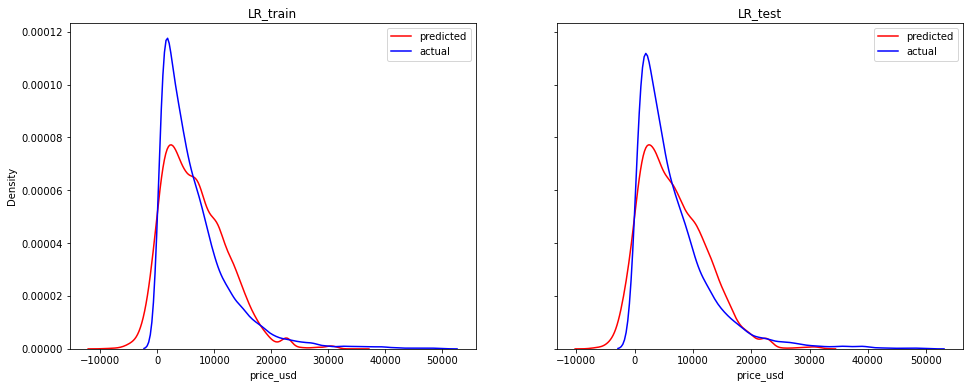

,Model,R-Square,Train_RMSE,Val_RMSE
0,LR,0.753823,3175.123,3213.479


In [101]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_final,y_train)
train_predicted = lm.predict(X_train_final)
test_predicted = lm.predict(X_test_final)


scores = get_metrics(y_train_final, train_predicted, y_test_final, test_predicted, "LR", scores)
scores

In [102]:
Coefficients = pd.DataFrame({"Features": X_train_final.columns, "Coefficients": lm.coef_})
Coefficients.head()

,Features,Coefficients
0,odometer_value,-751.775043
1,engine_capacity,374.349238
2,duration_listed,198.456017
3,model_age,-2446.758585
4,manu1,268.398892


In [103]:
lm.intercept_

10553.87524821063

In [104]:
Coefficients = Coefficients.sort_values('Coefficients', ascending=True)
Coefficients = Coefficients.reset_index(drop = True)

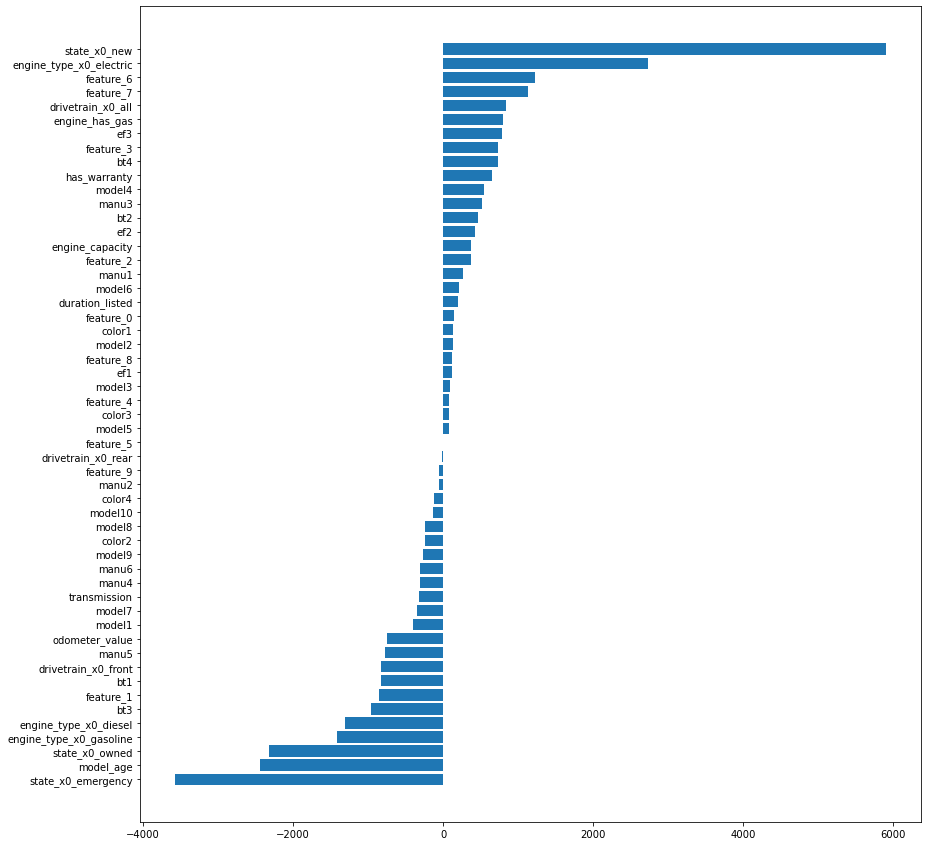

In [105]:
plt.figure(figsize = (14,15))
plt.barh(y = Coefficients['Features'],width=Coefficients['Coefficients']);

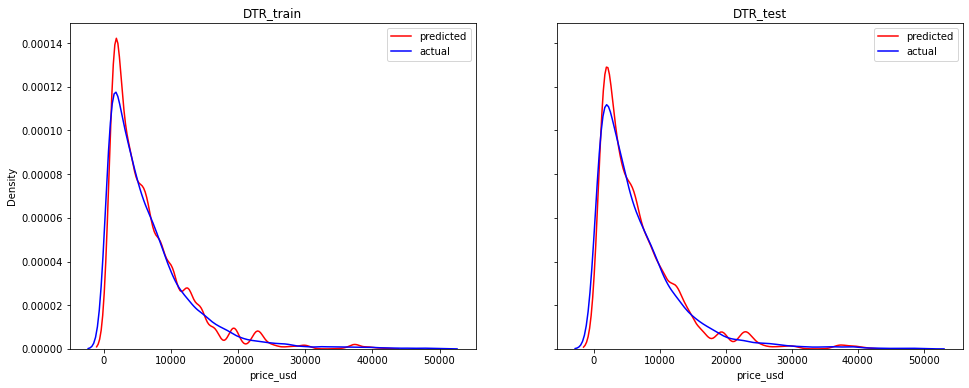

,Model,R-Square,Train_RMSE,Val_RMSE
0,LR,0.753823,3175.123,3213.479
1,DTR,0.859093,2402.164,2562.555


In [106]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(criterion='mse', max_depth=6, ccp_alpha=350,random_state=340)

dtr.fit(X_train_final, y_train)


train_predicted = dtr.predict(X_train_final)
test_predicted = dtr.predict(X_test_final)


scores = get_metrics(y_train_final, train_predicted, y_test_final, test_predicted, "DTR", scores)
scores

### Random Forest

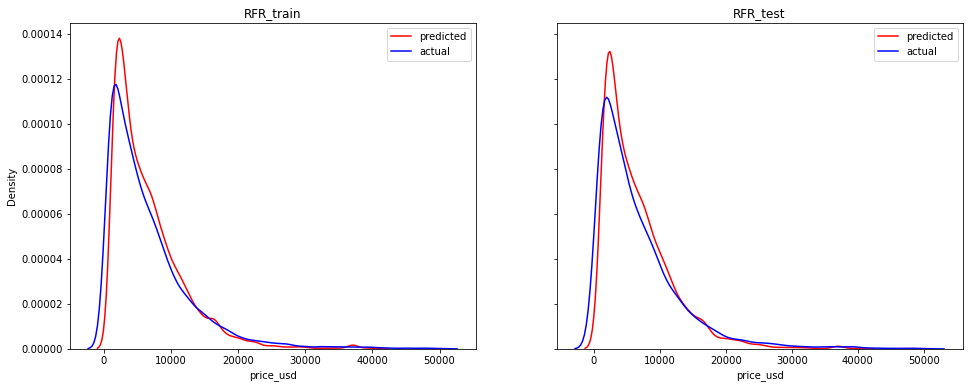

Wall time: 28 s


,Model,R-Square,Train_RMSE,Val_RMSE
0,LR,0.753823,3175.123,3213.479
1,DTR,0.859093,2402.164,2562.555
2,RFR,0.876846,2245.746,2450.765


In [107]:
%%time


from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=500, criterion='mse', ccp_alpha=10000, max_depth=8, max_features='sqrt', bootstrap=True,\
                            oob_score=True, random_state=340)



rfr.fit(X_train_final,y_train)

train_predicted = rfr.predict(X_train_final)
test_predicted = rfr.predict(X_test_final)



scores = get_metrics(y_train_final, train_predicted, y_test_final, test_predicted, "RFR", scores)
scores

### Randomized Grid Search
* 'param_distributions': {'n_estimators': array([93, 13, 64, 62, 88, 66, 39, 56, 23, 48]),

* 'max_features': [0.05, 0.31, 0.08, 0.25, 0.17, 0.22, 0.08, 0.01, 0.25, 0.13, 0.25, 0.16, 0.31, 0.12, 0.33],

* 'min_samples_split': array([0.03, 0.1 , 0.18, 0.14, 0.08, 0.15, 0.03, 0.09, 0.11, 0.15]),

* 'max_depth': array([15, 14,  8, 10, 13, 16,  8, 14])}

#### Randomized search best params
Best Params = {'n_estimators': 23,'min_samples_split': 0.03,'max_features': 0.33,'max_depth': 15}

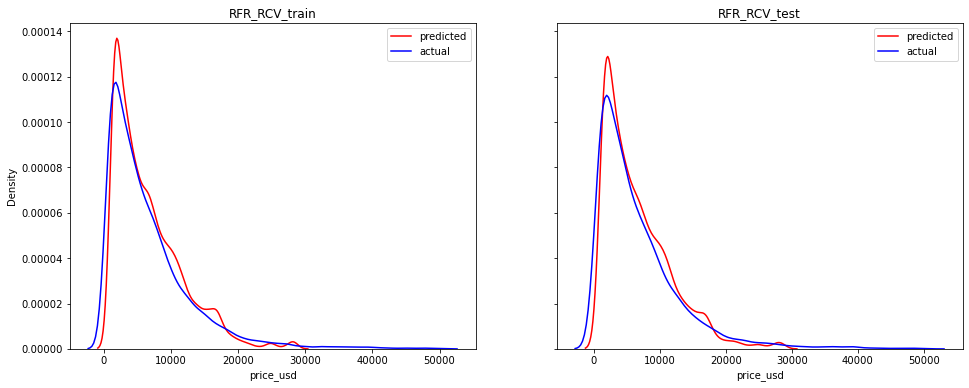

Wall time: 2.26 s


,Model,R-Square,Train_RMSE,Val_RMSE
0,LR,0.753823,3175.123,3213.479
1,DTR,0.859093,2402.164,2562.555
2,RFR,0.876846,2245.746,2450.765
3,RFR_RCV,0.818221,2728.399,2773.784


In [108]:
%%time

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint

rfr_rcv = RandomForestRegressor(n_jobs=-1, n_estimators = 23, min_samples_split= 0.03, max_features = 0.33, max_depth = 15, random_state=340,\
                               ccp_alpha=10000,bootstrap=True, oob_score=True)

rfr_rcv.fit(X_train_final, y_train)


train_predicted = rfr_rcv.predict(X_train_final)
test_predicted = rfr_rcv.predict(X_test_final)



scores = get_metrics(y_train_final, train_predicted, y_test_final, test_predicted, "RFR_RCV", scores)
scores

### Grid Search

In [109]:
from sklearn.model_selection import GridSearchCV

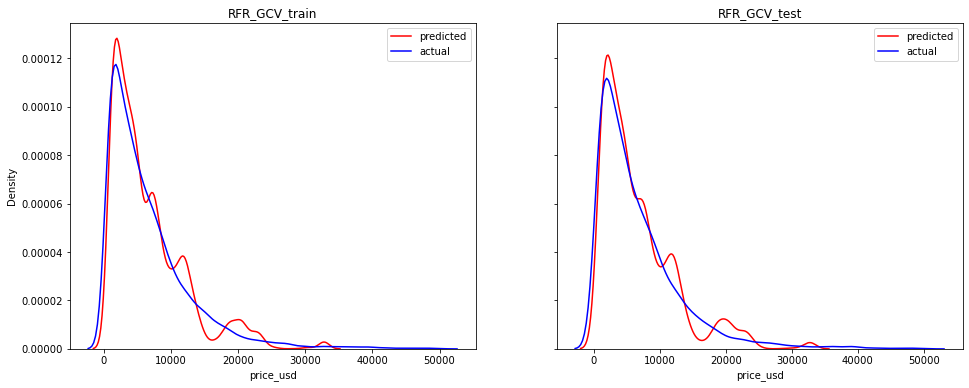

Wall time: 3.2 s


,Model,R-Square,Train_RMSE,Val_RMSE
0,LR,0.753823,3175.123,3213.479
1,DTR,0.859093,2402.164,2562.555
2,RFR,0.876846,2245.746,2450.765
3,RFR_RCV,0.818221,2728.399,2773.784
4,RFR_GCV,0.842828,2537.026,2608.070


In [110]:
%%time

rfr_gcv = RandomForestRegressor(n_jobs=-1, n_estimators = 20, min_samples_split= 0.025, max_features = None, max_depth = None, random_state=340,\
                               ccp_alpha=100,bootstrap=True, oob_score=True)

rfr_gcv.fit(X_train_final, y_train)

train_predicted = rfr_gcv.predict(X_train_final)
test_predicted = rfr_gcv.predict(X_test_final)

scores = get_metrics(y_train_final, train_predicted, y_test_final, test_predicted, "RFR_GCV", scores)
scores

### Converting the target to log values, so that we don't get negative values when we use XGBoostRegressor

In [111]:
import math

y_train_ln = y_train.apply(lambda x: math.log(1+x))
y_test_ln = y_test.apply(lambda x: math.log(1+x))

### XGBR

In [112]:
from xgboost import XGBRegressor

xgbr_gcv = XGBRegressor(random_state=340, subsample=0.8, gamma=2, base_score=2, learning_rate=0.05, n_estimators=500, booster='gbtree')

xgbr_gcv.fit(X_train_final,y_train_ln)

XGBRegressor(base_score=2, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=340,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

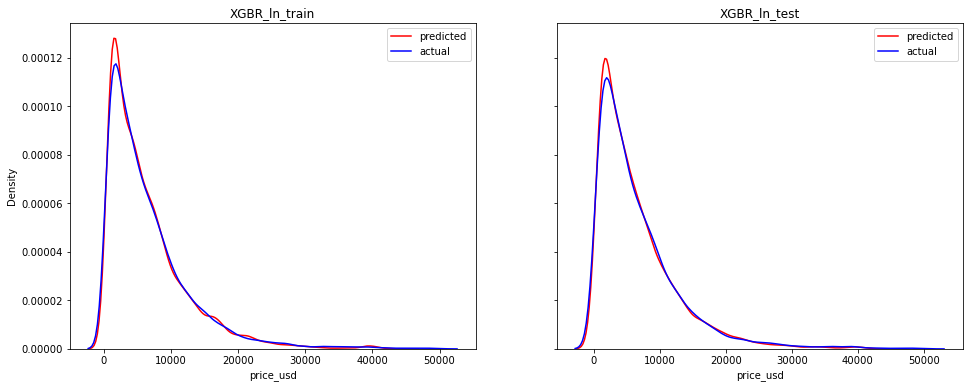

,Model,R-Square,Train_RMSE,Val_RMSE
0,LR,0.753823,3175.123,3213.479
1,DTR,0.859093,2402.164,2562.555
2,RFR,0.876846,2245.746,2450.765
3,RFR_RCV,0.818221,2728.399,2773.784
4,RFR_GCV,0.842828,2537.026,2608.070
5,XGBR_ln,0.924434,1759.137,1863.441


In [113]:
train_predicted = xgbr_gcv.predict(X_train_final)
test_predicted = xgbr_gcv.predict(X_test_final)



train_predicted_ln = pd.DataFrame(train_predicted)
test_predicted_ln = pd.DataFrame(test_predicted)


pred_train = train_predicted_ln.apply(lambda x: math.e**(x) - 1)
pred_test = test_predicted_ln.apply(lambda x: math.e**(x) - 1)

pred_train = pred_train.values
pred_test = pred_test.values


scores = get_metrics(y_train_final, pred_train, y_test_final, pred_test, "XGBR_ln", scores)
scores

### Building a model using important features

In [114]:
xgbr_gcv.feature_importances_

array([0.00484853, 0.04718458, 0.00448861, 0.28880396, 0.01138619,
       0.0057264 , 0.02215802, 0.01214848, 0.0158068 , 0.0052919 ,
       0.01644216, 0.01118201, 0.01148749, 0.01487793, 0.01282933,
       0.01168599, 0.01150954, 0.01021709, 0.0536632 , 0.01658022,
       0.00397965, 0.00339556, 0.00290881, 0.00300727, 0.00920045,
       0.        , 0.        , 0.00729411, 0.00632969, 0.00540901,
       0.00741777, 0.02836328, 0.        , 0.0083934 , 0.        ,
       0.        , 0.        , 0.00976663, 0.        , 0.        ,
       0.00445185, 0.08407322, 0.00311008, 0.03243461, 0.02158319,
       0.00890671, 0.02412719, 0.0094321 , 0.00555211, 0.03418848,
       0.05644275, 0.0175857 , 0.01432799], dtype=float32)

In [115]:
features = X_train_final.columns
importances = xgbr_gcv.feature_importances_

indices = np.argsort(importances)[::-1]

pd.set_option('max_columns',None)
pd.DataFrame([X_train_final.columns[indices],np.sort(importances)[::-1]])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52
0,model_age,drivetrain_x0_front,feature_7,model9,engine_capacity,feature_6,feature_0,transmission,feature_3,manu3,feature_1,feature_8,model10,model1,manu5,model4,feature_9,model5,manu4,model6,model7,model3,manu1,model2,model8,state_x0_emergency,feature_4,ef1,feature_2,engine_type_x0_diesel,bt4,bt1,bt2,manu2,feature_5,bt3,manu6,odometer_value,duration_listed,drivetrain_x0_all,color1,color2,drivetrain_x0_rear,color4,color3,ef2,engine_has_gas,engine_type_x0_electric,engine_type_x0_gasoline,has_warranty,state_x0_new,state_x0_owned,ef3
1,0.288804,0.0840732,0.0564428,0.0536632,0.0471846,0.0341885,0.0324346,0.0283633,0.0241272,0.022158,0.0215832,0.0175857,0.0165802,0.0164422,0.0158068,0.0148779,0.014328,0.0128293,0.0121485,0.011686,0.0115095,0.0114875,0.0113862,0.011182,0.0102171,0.00976663,0.0094321,0.00920045,0.00890671,0.0083934,0.00741777,0.00729411,0.00632969,0.0057264,0.00555211,0.00540901,0.0052919,0.00484853,0.00448861,0.00445185,0.00397965,0.00339556,0.00311008,0.00300727,0.00290881,0,0,0,0,0,0,0,0


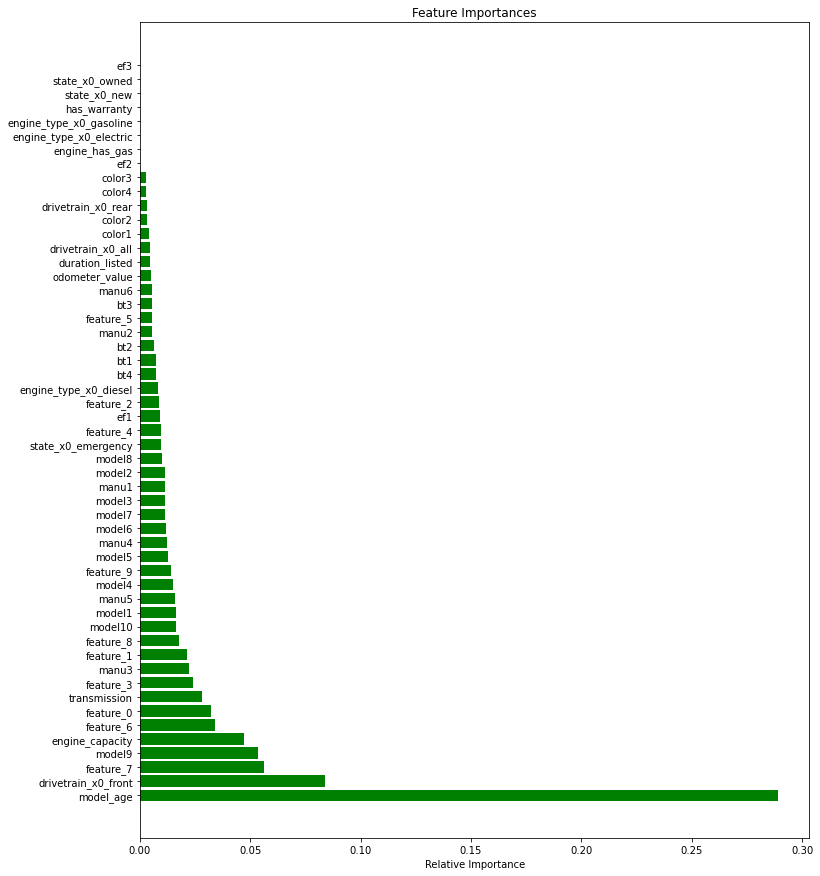

In [116]:
plt.figure(figsize = (12,15));
plt.title('Feature Importances');
plt.barh(range(len(indices)), importances[indices], color='green');
plt.yticks(range(len(indices)), [features[i] for i in indices]);
plt.xlabel('Relative Importance');

### These values indicate how often a feature is used in splitting and how important was its role in reducing the loss.
* We can see that model age is a key feature in reducing the loss.

In [117]:
imp_indices = []
for x in indices:
    if importances[x] > 0:
        imp_indices.append(x)
        
print(imp_indices)
print(len(imp_indices))
print('\n')
imp_cols = list(X_train_final.columns[imp_indices])
print(imp_cols)

[3, 41, 50, 18, 1, 49, 43, 31, 46, 6, 44, 51, 19, 10, 8, 13, 52, 14, 7, 15, 16, 12, 4, 11, 17, 37, 47, 24, 45, 33, 30, 27, 28, 5, 48, 29, 9, 0, 2, 40, 20, 21, 42, 23, 22]
45


['model_age', 'drivetrain_x0_front', 'feature_7', 'model9', 'engine_capacity', 'feature_6', 'feature_0', 'transmission', 'feature_3', 'manu3', 'feature_1', 'feature_8', 'model10', 'model1', 'manu5', 'model4', 'feature_9', 'model5', 'manu4', 'model6', 'model7', 'model3', 'manu1', 'model2', 'model8', 'state_x0_emergency', 'feature_4', 'ef1', 'feature_2', 'engine_type_x0_diesel', 'bt4', 'bt1', 'bt2', 'manu2', 'feature_5', 'bt3', 'manu6', 'odometer_value', 'duration_listed', 'drivetrain_x0_all', 'color1', 'color2', 'drivetrain_x0_rear', 'color4', 'color3']


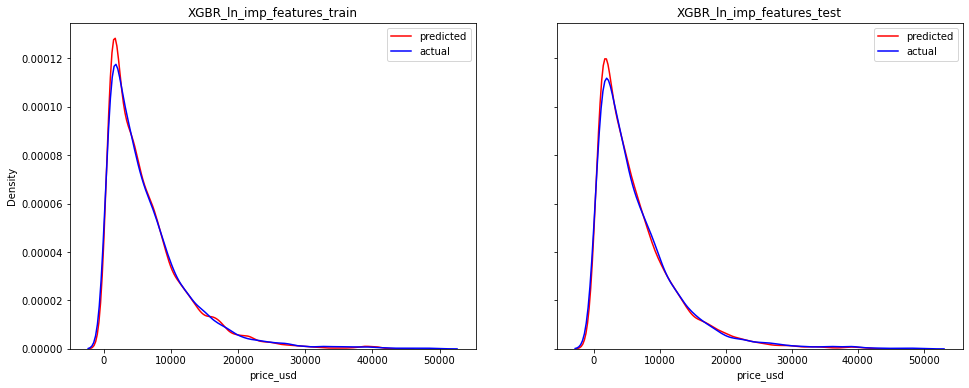

,Model,R-Square,Train_RMSE,Val_RMSE
0,LR,0.753823,3175.123,3213.479
1,DTR,0.859093,2402.164,2562.555
2,RFR,0.876846,2245.746,2450.765
3,RFR_RCV,0.818221,2728.399,2773.784
4,RFR_GCV,0.842828,2537.026,2608.070
5,XGBR_ln,0.924434,1759.137,1863.441
6,XGBR_ln_imp_features,0.924555,1757.730,1864.696


In [118]:
xgbr_gcv.fit(X_train_final[imp_cols],y_train_ln)

train_predicted = xgbr_gcv.predict(X_train_final[imp_cols])
test_predicted = xgbr_gcv.predict(X_test_final[imp_cols])


train_predicted_ln = pd.DataFrame(train_predicted)
test_predicted_ln = pd.DataFrame(test_predicted)


pred_train = train_predicted_ln.apply(lambda x: math.e**(x) - 1)
pred_test = test_predicted_ln.apply(lambda x: math.e**(x) - 1)

pred_train = pred_train.values
pred_test = pred_test.values


scores = get_metrics(y_train_final, pred_train, y_test_final, pred_test, "XGBR_ln_imp_features", scores)
scores